In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Carga de data en archivo csv
df= pd.read_csv('ModeloNoSupervisado.csv')
print(df)

      id  portafolio          y          x     ventas  canastas
0      1       12965  10.924652 -74.817584  12.834683        63
1      2       30422  10.958175 -74.792214  12.765690        87
2      3        7790  11.030142 -74.871778  12.765690        68
3      4        9790  10.934783 -74.813503  12.072541        63
4      5       30651  10.931563 -74.810437  13.815511        86
..   ...         ...        ...        ...        ...       ...
716  717       25056  10.928018 -74.808330  13.815511        80
717  718       17010  10.938586 -74.798813  12.765690        69
718  719       19373  10.944976 -74.800435  12.765690        77
719  720       20839  10.941326 -74.800389  12.072541        70
720  721       14521  10.941730 -74.792107  12.072541        72

[721 rows x 6 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          721 non-null    int64  
 1   portafolio  721 non-null    int64  
 2   y           721 non-null    float64
 3   x           721 non-null    float64
 4   ventas      721 non-null    float64
 5   canastas    721 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 33.9 KB


In [5]:
df.describe()

,id,portafolio,y,x,ventas,canastas
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,15214.291262,10.953665,-74.809770,13.102517,63.570042
std,208.27906,10801.912231,0.021347,0.019385,0.517831,17.703606
min,1.00000,0.000000,10.922264,-74.871778,11.512925,25.000000
25%,181.00000,5255.000000,10.935717,-74.824774,12.765690,43.000000
50%,361.00000,15948.000000,10.951763,-74.810178,13.304686,70.000000
75%,541.00000,26163.000000,10.967987,-74.798813,13.304686,78.000000
max,721.00000,31374.000000,11.043528,-74.762737,14.038654,94.000000


In [6]:
indices = [5, 26, 176, 392, 467, 567,670]
muestras = pd.DataFrame(df.loc[indices], 
                       columns = df.keys()).reset_index(drop = True)
df = df.drop(indices, axis = 0)

#Eliminamos las columnas de región y canal 
df = df.drop(['id'], axis = 1)
muestras = muestras.drop(['id'], axis = 1)

In [9]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing
data_escalada = preprocessing.Normalizer().fit_transform(df)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [10]:
### ANÁLISIS DE MACHINE LEARNING ###
from sklearn.cluster import KMeans
#Se determina las variables a evaluar
X = data_escalada.copy()

In [11]:
## Hallar el valor óptimo de K ##
#Se aplicará el método de codo para hallar K
#Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = [] 
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)

In [21]:
## Se aplica el algoritmo de clustering ##
#Se define el algoritmo junto con el valor de K
algoritmo = KMeans(n_clusters = 6, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

In [22]:
#Se entrena el algoritmo
algoritmo.fit(X)
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [23]:
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.predict(muestras_escalada)

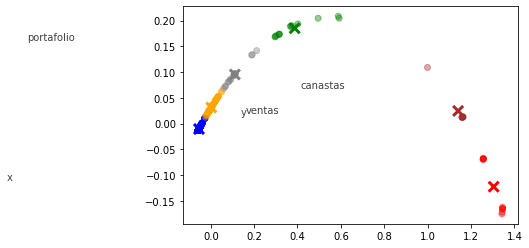

In [25]:
    
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)
# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']
#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]
#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)
#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)
#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = df.columns
#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)


In [26]:
#Conteste las siguientes preguntas como código comentariado en su script:
#a. ¿Cuántos clusters sugiere calcular para este data set?
# Se han utilizado seis clusters, para una mejor forma de ver los datos, los clusters que se sugieren depende del analisis que se dan sobre el metodo del codo
#b. ¿Cómo puede validar la coherencia de sus clusters?
# Se valida con una lista aleatoria, esta se puede dar o se puede hacer una función para ver datos aleatorios sobre estos clusters

In [27]:
sns.pairplot(df, palette='Dark2')